## **Training Yolov8 on custom Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Spliting dataset to train and test

In [2]:
!unzip /content/drive/MyDrive/RsStudioProject/Dee_images.zip

Archive:  /content/drive/MyDrive/RsStudioProject/Dee_images.zip
  inflating: Dee_images/00217c64-511624_5401489_Base_A62_Luftbild_2021_EPSG25832.png  
 extracting: Dee_images/00217c64-511624_5401489_Base_A62_Luftbild_2021_EPSG25832.txt  
  inflating: Dee_images/003af38f-511721_5404650_Base_A62_Luftbild_2021_EPSG25832.png  
 extracting: Dee_images/003af38f-511721_5404650_Base_A62_Luftbild_2021_EPSG25832.txt  
  inflating: Dee_images/00947179-512597_5402486_Base_A62_Luftbild_2021_EPSG25832.png  
  inflating: Dee_images/00947179-512597_5402486_Base_A62_Luftbild_2021_EPSG25832.txt  
  inflating: Dee_images/00b7b6fe-511721_5404042_Base_A62_Luftbild_2021_EPSG25832.png  
  inflating: Dee_images/00b7b6fe-511721_5404042_Base_A62_Luftbild_2021_EPSG25832.txt  
  inflating: Dee_images/00dd01fd-511745_5402461_Base_A62_Luftbild_2021_EPSG25832.png  
 extracting: Dee_images/00dd01fd-511745_5402461_Base_A62_Luftbild_2021_EPSG25832.txt  
  inflating: Dee_images/0133a82d-511745_5401318_Base_A62_Luftbild_

In [2]:
%cd /content/drive/MyDrive/RsStudioProject

/content/drive/MyDrive/RsStudioProject


In [5]:
 !python splityolo.py --imageDir Dee_images --outputDir trainTest --ratio .1 --txt

/content/drive/MyDrive/RsStudioProject/splityolo.py:35: DeprecationWarning: Flags not at the start of the expression '([a-zA-Z0-9\\s_\\\\.\\-\\' (truncated) but at position 27
  if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png)$', f)]
Traceback (most recent call last):
  File "/content/drive/MyDrive/RsStudioProject/splityolo.py", line 98, in <module>
    main()
  File "/content/drive/MyDrive/RsStudioProject/splityolo.py", line 94, in main
    iterate_dir(args.imageDir, args.outputDir, args.ratio, args.txt)
  File "/content/drive/MyDrive/RsStudioProject/splityolo.py", line 52, in iterate_dir
    copyfile(os.path.join(source, filename),
  File "/usr/lib/python3.10/shutil.py", line 258, in copyfile
    if _HAS_FCOPYFILE:
KeyboardInterrupt
^C


In [3]:
# installing package to work with yolov8
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 27.5 MB/s eta 0:00:00


In [4]:
# to check and monitoring of NVIDIA GPU devices.
!nvidia-smi

Sat Oct 19 16:29:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### YOLOV8 Installation:
We used to clone the repo or use torchhub to work with Yolov5. The recent YoloV8 has been released as pip package, so we don't need to clone any repo. This package alone installs ever dependency for yolov8.

The Pip install of the ultralytics package including all requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7.

YOLOV8 format:
The format for Yolov8 is same as Yolov5. The YOLO format, with one .txt file per image (if no objects in image, no .txt file is required). The *.txt file specifications are:

One row per object Each row is class x_center y_center width height format.

Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes are in pixels, divide x_center and width by image width, and y_center and height by image height. Class numbers are zero-indexed (start from 0).

In [5]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/drive/MyDrive/RsStudioProject/trainTest/train/00947179-512597_5402486_Base_A62_Luftbild_2021_EPSG25832.png')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('/content/drive/MyDrive/RsStudioProject/trainTest/test/0c8d3971-511600_5403702_Base_A62_Luftbild_2021_EPSG25832.png')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

shape of the training image 128, 128
shape of the validation image 128, 128


In [6]:
%cd /content/drive/MyDrive/RsStudioProject/trainTest

/content/drive/MyDrive/RsStudioProject/trainTest


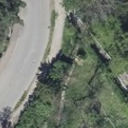

In [7]:
# dispying with different width
from IPython.display import Image
Image(filename='/content/drive/MyDrive/RsStudioProject/trainTest/train/00217c64-511624_5401489_Base_A62_Luftbild_2021_EPSG25832.png', width=300)


In [8]:
# I will write the contents of the cell to a file
%%writefile /content/drive/MyDrive/RsStudioProject/trainTest/complete.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/drive/MyDrive/RsStudioProject/trainTest # dataset root dir
train: train # train images (relative to 'path')
val: test # val images (relative to 'path')
test:  # test images (optional)

# number of classes
nc: 2

# class names
#names: ['1']
names: ['Car','Truck']  # class names


Overwriting /content/drive/MyDrive/RsStudioProject/trainTest/complete.yaml


In [9]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [13]:
%cd /content/drive/MyDrive/RsStudioProject/trainTest

/content/drive/MyDrive/RsStudioProject/trainTest


In [11]:
# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/RsStudioProject/trainTest/complete.yaml", epochs=2, imgsz=640,cache=False)  # train the model
#Disable wandb integration

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/RsStudioProject/trainTest/complete.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 92.6MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/RsStudioProject/trainTest/train... 1282 images, 403 backgrounds, 26 corrupt: 100%|██████████| 1283/1283 [00:50<00:00, 25.54it/s] 

train: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/train/067e1d72-511600_5404164_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2575]
train: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/train/1342ab92-511648_5401562_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/RsStudioProject/trainTest/train/1342ab92-511648_5401562_Base_A62_Luftbild_2021_EPSG25832.png'
train: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/train/20f7b8da-511600_5402753_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2305]
train: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/train/24f63abc-511600_5403069_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1467]
train: WARNING ⚠️ /co

train: New cache created: /content/drive/MyDrive/RsStudioProject/trainTest/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/RsStudioProject/trainTest/test... 461 images, 145 backgrounds, 13 corrupt: 100%|██████████| 461/461 [00:17<00:00, 26.07it/s] 

val: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/test/067e1d72-511600_5404164_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2575]
val: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/test/24f63abc-511600_5403069_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1467]
val: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/test/25073526-511624_5402899_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3204]
val: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/test/29118a9a-511624_5402729_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2126      1.1617]
val: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/test/62228d64-511600_5401124_Base_A62_Luftb

val: New cache created: /content/drive/MyDrive/RsStudioProject/trainTest/test.cache
Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      6.79G      1.567      1.967      1.485         36        640: 100%|██████████| 79/79 [00:46<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.43it/s]


                   all        448        914    0.00743      0.321    0.00661    0.00347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      6.85G      1.504       1.28      1.443         31        640: 100%|██████████| 79/79 [00:43<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]

                   all        448        914      0.164      0.392      0.155     0.0827



2 epochs completed in 0.033 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 52.0MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.14it/s]


                   all        448        914      0.163      0.394      0.154     0.0824
                   Car        297        864      0.325      0.788      0.304      0.162
                 Truck         33         50          0          0    0.00496    0.00286
Speed: 0.3ms preprocess, 9.6ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/train5


lr/pg0,▁█
lr/pg1,▁█
lr/pg2,▁█
metrics/mAP50(B),▁█
metrics/mAP50-95(B),▁█
metrics/precision(B),▁█
metrics/recall(B),▁█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▁


**Val:**

Validate trained YOLOv8n model accuracy on the validatio dataset. No argument need to passed as the model retains it's training data and arguments as model attributes.

In [12]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/RsStudioProject/trainTest/test.cache... 461 images, 145 backgrounds, 13 corrupt: 100%|██████████| 461/461 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/test/067e1d72-511600_5404164_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2575]
val: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/test/24f63abc-511600_5403069_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1467]
val: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/test/25073526-511624_5402899_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3204]
val: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/test/29118a9a-511624_5402729_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2126      1.1617]
val: WARNING ⚠️ /content/drive/MyDrive/RsStudioProject/trainTest/test/62228d64-511600_5401124_Base_A62_Luftb


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:17<00:00,  1.59it/s]


                   all        448        914      0.164      0.391      0.155     0.0828
                   Car        297        864      0.327      0.782      0.305      0.163
                 Truck         33         50          0          0    0.00497    0.00289
Speed: 0.3ms preprocess, 21.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train52


array([    0.16263,   0.0028879])

Inference:

In [13]:
# Load a model
#model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/MyDrive/RsStudioProject/trainTest/runs/detect/train/weights/best.pt')  # load a custom trained

# Export the model
model.export(format='torchscript')
# model.export(format='onnx',simplify=True)

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/RsStudioProject/trainTest/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (148.5 MB)

TorchScript: starting export with torch 2.4.1+cu121...
TorchScript: export success ✅ 11.6s, saved as '/content/drive/MyDrive/RsStudioProject/trainTest/runs/detect/train/weights/best.torchscript' (99.1 MB)

Export complete (15.3s)
Results saved to /content/drive/MyDrive/RsStudioProject/trainTest/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/drive/MyDrive/RsStudioProject/trainTest/runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/content/drive/MyDrive/RsStudioProject/trainTest/runs/detect/train/weights/best.torchscript imgsz=640 data=/content/drive/MyDri

'/content/drive/MyDrive/RsStudioProject/trainTest/runs/detect/train/weights/best.torchscript'

In [14]:
# Run batched inference on a list of images
results = model(["/content/drive/MyDrive/RsStudioProject/inference/512426_5403921_Base_A62_Luftbild_2021_EPSG25832.png"])


0: 640x640 4 Cars, 37.0ms
Speed: 3.8ms preprocess, 37.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Process results list
# Process results generator
for idx, result in enumerate(results):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # Display to screen
    result.save(filename=f"result_{idx}.jpg")  # Save to

TypeError: 'DetMetrics' object is not iterable